# Supervised Learning
This file demonstrates five supervised learning algorithms' performance on the classfication problem on numerical dataset. The five supervised learning algorithms are:


*   Decision Tree
*   Neural Network
*   Boosting
*   SVM
*   KNN

## Data Preprocessing




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

One dataset (drybeam dataset) is adopted from UCI Machine Learning Depository (https://archive.ics.uci.edu/ml/datasets/Dry+Bean+Dataset). This dataset is sourced from Koklu and Ozkan' work (KOKLU, M. and OZKAN, I.A., (2020), “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture, 174, 105507), which contains 13,611 instances of beans with 16 features. The task is to classify the 7 types of beans in Turkey; Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira.

### Load Data

In [2]:
url_1 = "https://github.com/charles2648/CS7641_Supervised_Learning/blob/main/Dry_Bean_Dataset.xlsx?raw=true"
# load depression data
df_bean = pd.read_excel(url_1)
print("Data has", len(df_bean), "rows and", len(df_bean.columns), "columns.")
if df_bean.isnull().values.any():
    print("Warning: Missing Data")
label = df_bean["Class"].unique()
df_bean.head()

Data has 13611 rows and 17 columns.


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
print ("Data has class of", label)

Data has class of ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


#### Check duplicates

In [4]:
if df_bean.duplicated(subset=None, keep='first').sum() > 0:
  df_bean.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)

### Explore the data 

#### Summary of Data

In [5]:
df_bean.describe(percentiles=[.25, .5, .75, 0.995]).T


,count,mean,std,min,25%,50%,75%,99.5%,max
Area,13543.0,53048.460385,29392.438324,20420.000000,36282.500000,44580.000000,61382.000000,200926.570000,254616.000000
Perimeter,13543.0,854.993406,214.722684,524.736000,703.230000,793.896000,977.146500,1716.459720,1985.370000
MajorAxisLength,13543.0,319.895602,85.809260,183.601165,253.086806,296.404589,376.312489,651.201993,738.860153
MinorAxisLength,13543.0,202.365321,45.051632,122.512653,175.886357,192.491117,217.245403,401.456981,460.198497
AspectRation,13543.0,1.581075,0.245245,1.024868,1.430662,1.549860,1.703916,2.247636,2.430306
Eccentricity,13543.0,0.750315,0.091858,0.218951,0.715144,0.763997,0.809671,0.895574,0.911423
ConvexArea,13543.0,53767.986709,29844.248525,20684.000000,36673.000000,45122.000000,62360.000000,203406.050000,263261.000000
EquivDiameter,13543.0,253.034094,59.307709,161.243764,214.933277,238.245711,279.560351,505.793910,569.374358
Extent,13543.0,0.749829,0.048939,0.555315,0.718735,0.759903,0.786849,0.831377,0.866195
Solidity,13543.0,0.987152,0.004650,0.919246,0.985678,0.988288,0.990019,0.993305,0.994677


#### EDA
Check the distribution of class type

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


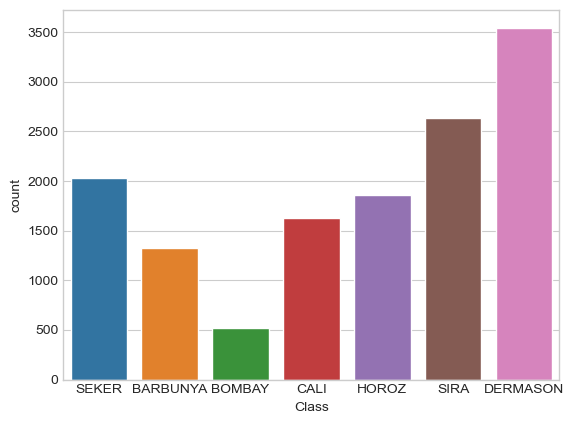

In [6]:
print(df_bean['Class'].value_counts())
_ = sns.countplot(x='Class', data=df_bean)

We can see that there is imbalance in the bean type.

Check the distributions of features

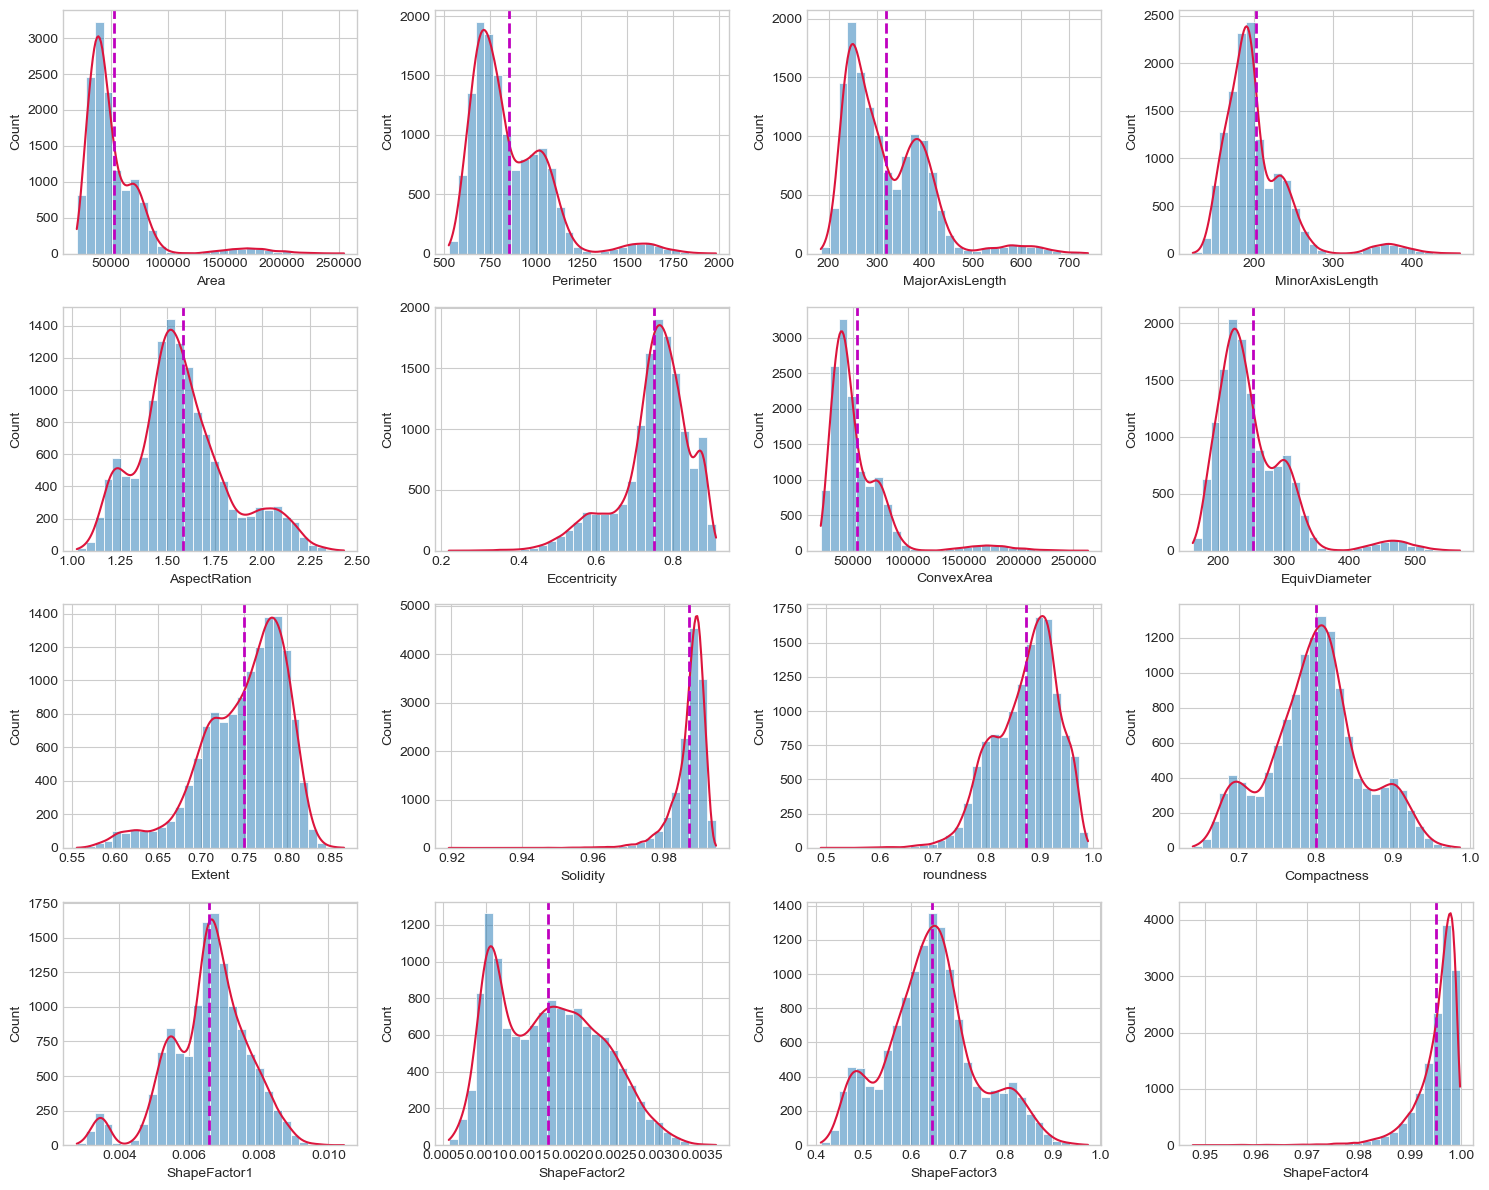

In [7]:
Numeric_cols = df_bean.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df_bean[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df_bean[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

From histograms shown above, we can see that some features have **long tail** and **bi-modal**. It means some types of beans are quite distinct from others. In the next step, distruibtions of features are explored for different type of beans.

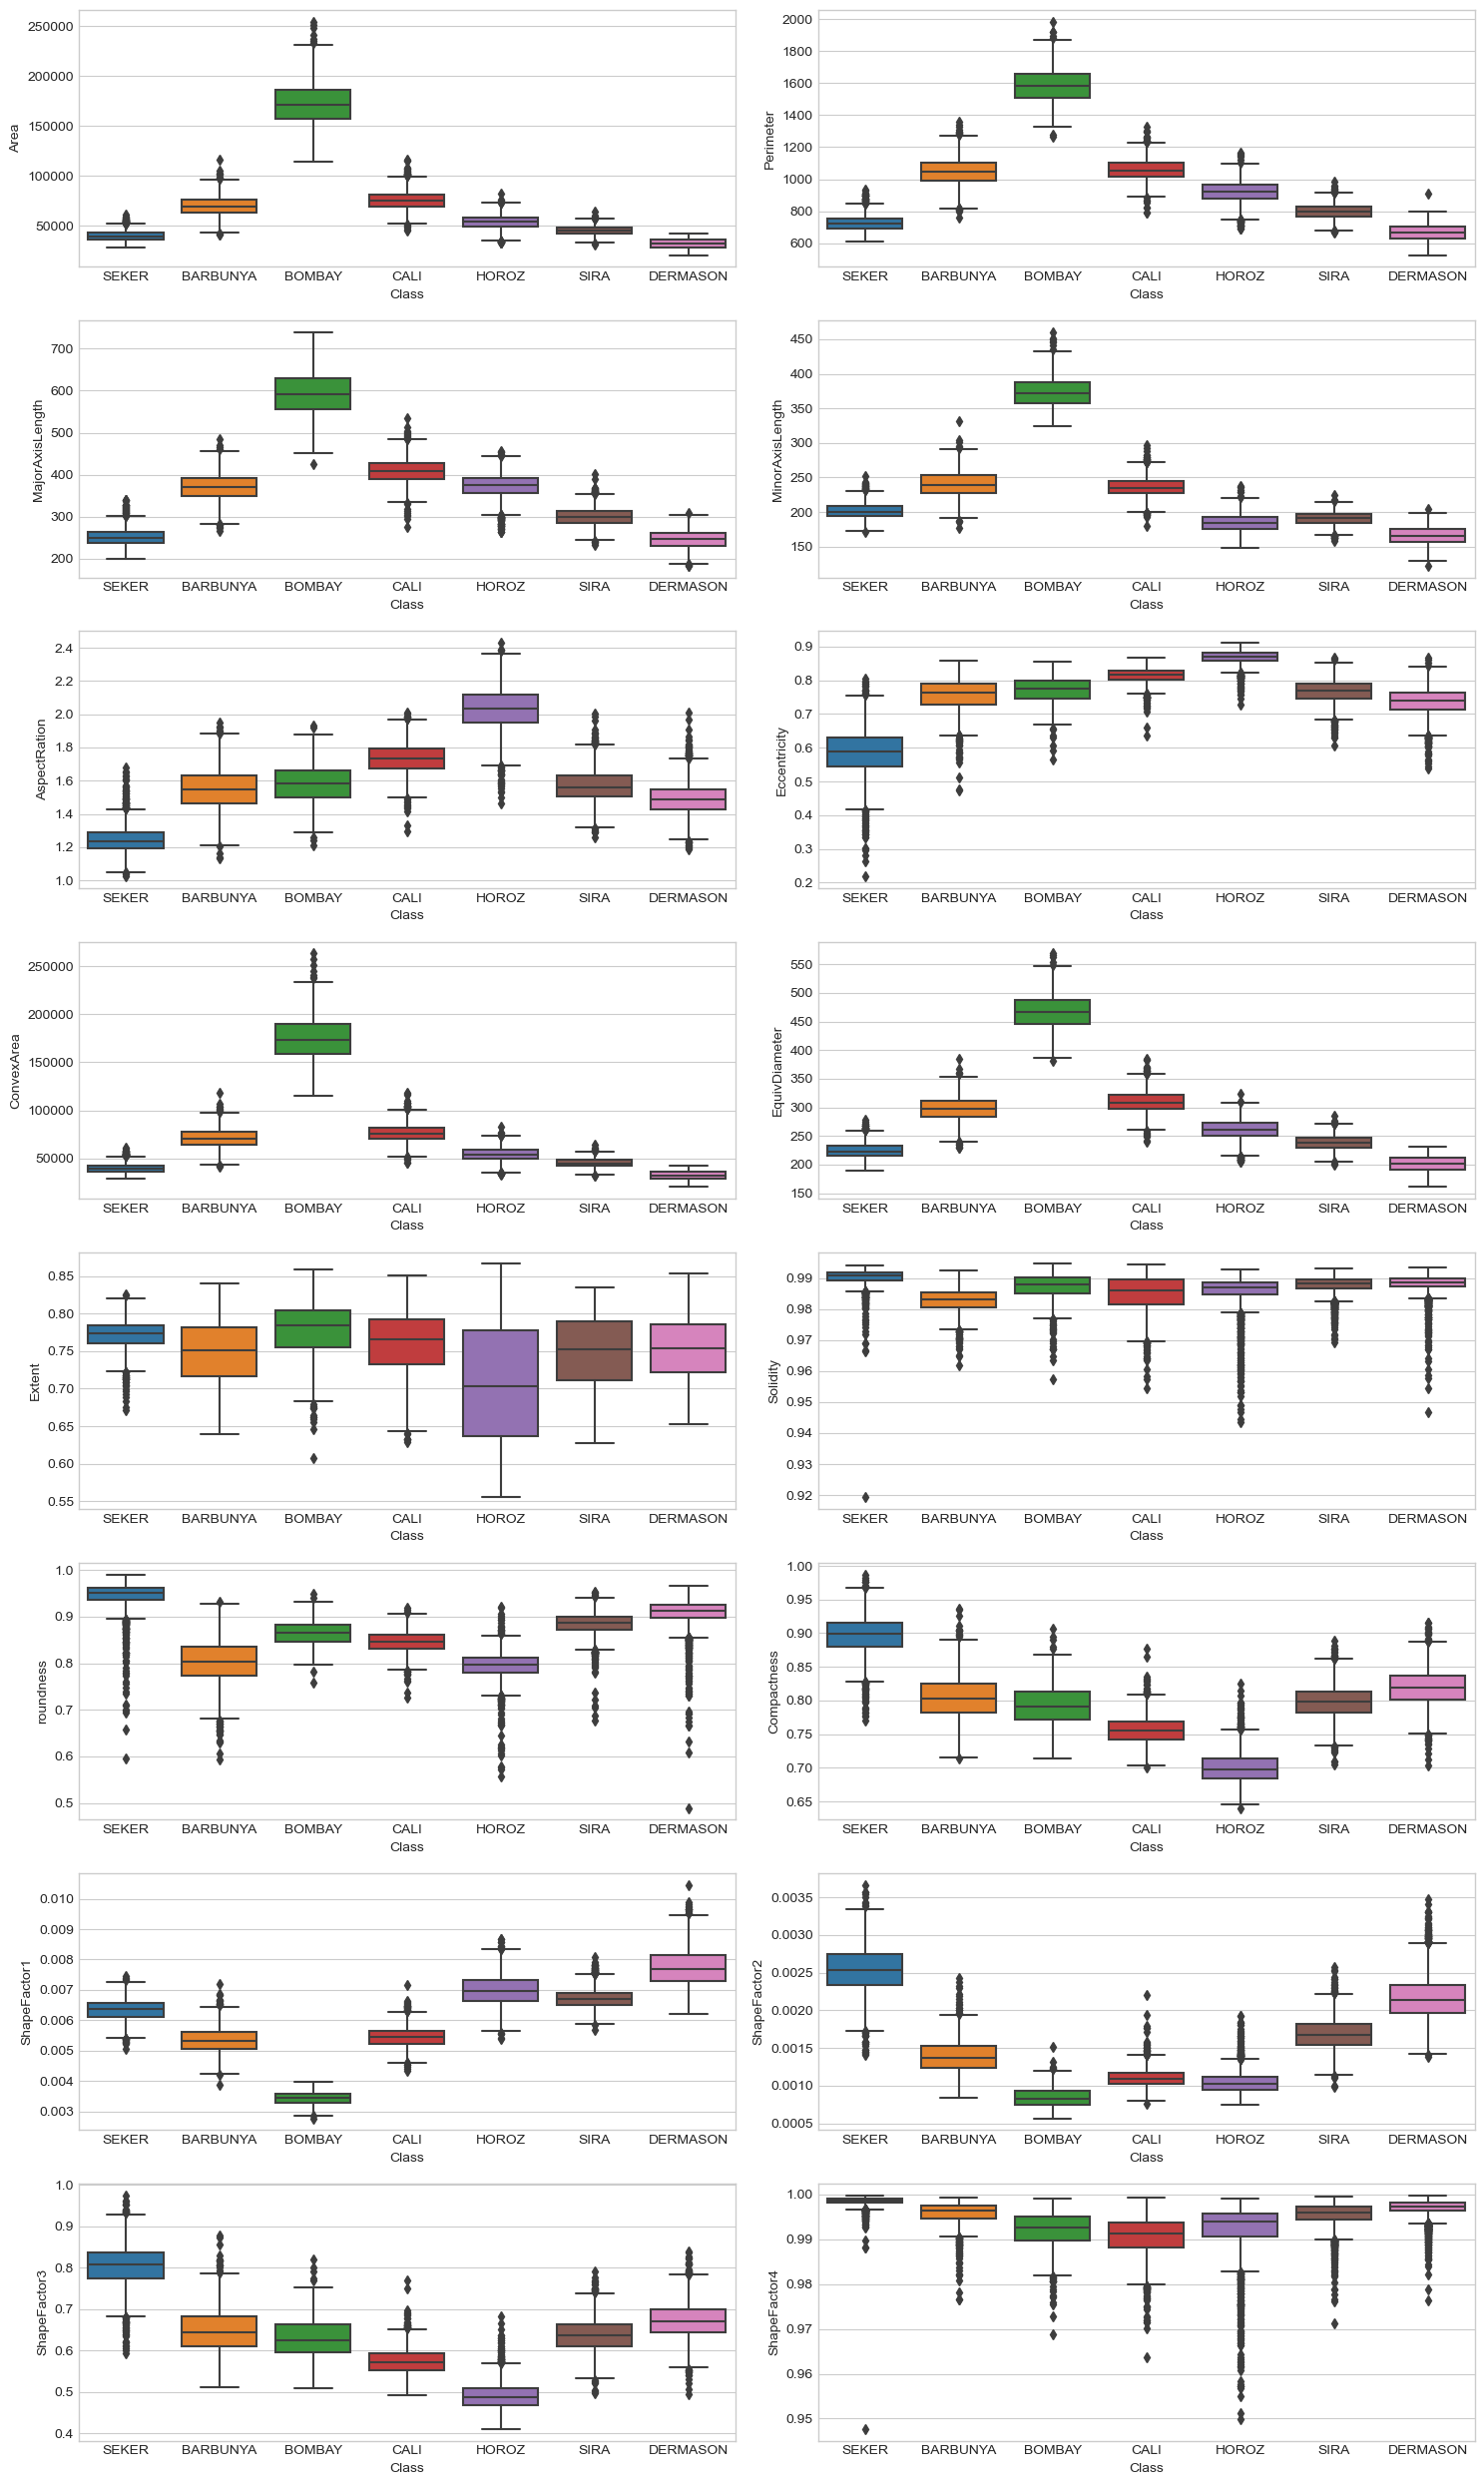

In [8]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df_bean['Class'], y= df_bean[variable], ax=subplot)
plt.tight_layout()

From figures above, we can see "Seker", "Bombay" and "Horoz" are quite different from other type of beans. 

Pearson linear correlation

/var/folders/yq/rrz1xzpj60j7kl2lvygmc3800000gn/T/ipykernel_15670/4072312129.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_bean.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)


<AxesSubplot:>

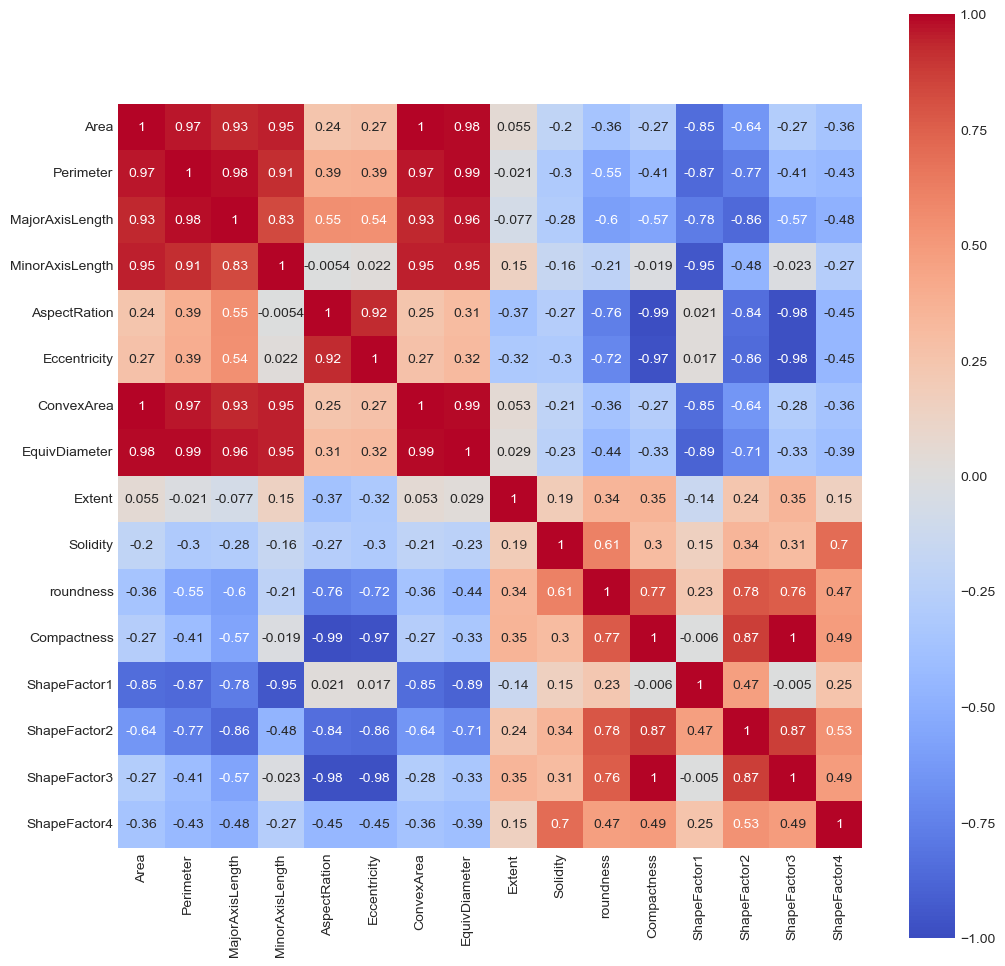

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(df_bean.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

From the pearson correlation figure above, we can see many features are highly correlated. In the following analysis, [Regularization methods using Lasso regularization. ](https://en.wikipedia.org/wiki/Lasso_(statistics)) is used to select important features.

## Supervised Learning

In this part, five supervised learning models (Decision Tree, Neural Network, Boosting, SVM, KNN) are used to classify the beans. RFE method and L1-based feature selection are adopted to eliminate unimportant features. Parameters are tuned to show how different parameters affect the performance of the models.  

### Data preparation

In [10]:
# turn categorical class type into numerical values
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
le = LabelEncoder()
df_bean['Class'] = le.fit_transform(df_bean['Class'])

X = df_bean.drop(['Class'], axis=1)
y = df_bean.Class

# Data Split
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size = 0.2, random_state = 100, stratify=y)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

L<sub>1</sub> regularization uses a penalty term to cause the coefficient of the irrelevant feature to 0, thus using this method can select the relevant features. The code below is modified based on [this page](https://scikit-learn.org/stable/modules/feature_selection.html#rfe)

In [11]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter=10000)
model = SelectFromModel(lsvc)
X_l1_train = model.fit_transform(X_train,y_train)
X_l1_test = model.transform(X_test)

### Define Helper functions
Let'sdefine some helper functions that will be used across all of the models. We define a function that plots the learning curve of an classification model. Additionally, we define functions to output final model scores using an untouched test dataset.

In [12]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import timeit

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12

def plot_learning_curve(clf, X, y, title="Insert Title"):
    
    n = len(y)
    train_mean = [] #model performance score (f1)
    cv_mean = []  #model performance score (f1)
    fit_mean = [] #model fit/training time
    pred_mean = [] #model test/prediction times
    train_sizes = (np.linspace(.05, 1.0, 20)*n).astype('int')  
    
    for i in train_sizes:
        idx = np.random.randint(X.shape[0], size=i)
        X_subset = X[idx,:]
        y_subset = y[idx]
        scores = cross_validate(clf, X_subset, y_subset, cv=10, scoring='f1_weighted', n_jobs=-1, return_train_score=True)
        
        train_mean.append(np.mean(scores['train_score']))
        cv_mean.append(np.mean(scores['test_score']))
        fit_mean.append(np.mean(scores['fit_time']))
        pred_mean.append(np.mean(scores['score_time']))
    
    train_mean = np.array(train_mean)
    cv_mean = np.array(cv_mean)
    fit_mean = np.array(fit_mean)
    
    plot_LC(train_sizes, train_mean, cv_mean, title)
    plot_times(train_sizes, fit_mean, pred_mean, title)
    
    return train_sizes, fit_mean, pred_mean
    

def plot_LC(train_sizes, train_mean, cv_mean, title):
    
    plt.figure()
    plt.title("Learning Curve: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model F1 Score")
    plt.plot(train_sizes, train_mean, 'o-', color="b", label="Training Score")
    plt.plot(train_sizes, cv_mean, 'o-', color="r", label="Cross-Validation Score")
    plt.legend(loc="best")
    plt.show()
    
    
def plot_times(train_sizes, fit_mean, pred_mean, title):
    
    plt.figure()
    plt.title("Modeling Time: "+ title)
    plt.xlabel("Training Examples")
    plt.ylabel("Training Time (s)")
    plt.plot(train_sizes, fit_mean, 'o-', color="b", label="Training Time (s)")
    plt.plot(train_sizes, pred_mean, 'o-', color="r", label="Prediction Time (s)")
    plt.legend(loc="best")
    plt.show()
    
    
def final_classifier_evaluation(clf,X_train, X_test, y_train, y_test):
    
    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time
    
    start_time = timeit.default_timer()    
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)
    end_time = timeit.default_timer()
    pred_time = end_time - start_time
    
    auc = roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print("Model Evaluation Metrics Using Test Dataset")
    print("*****************************************************")
    print("Model Training Time (s):   "+"{:.5f}".format(training_time))
    print("Model Prediction Time (s): "+"{:.5f}\n".format(pred_time))
    print("F1 Score:  "+"{:.2f}".format(f1))
    print("Balanced Accuracy:  "+"{:.2f}".format(accuracy)+"     AUC:       "+"{:.2f}".format(auc))
    print("Precision: "+"{:.2f}".format(precision)+"     Recall:    "+"{:.2f}".format(recall))
    print("*****************************************************")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='tab20c', display_labels=clf.classes_).plot()

### Neural Network



In [13]:
from sklearn.neural_network import MLPClassifier

def hyperNN(X_train, y_train, X_test, y_test, title):

    f1_test = []
    f1_train = []
    hlist = np.linspace(1,30,15).astype('int')
    for i in hlist:         
            clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='relu', 
                                learning_rate_init=0.05, random_state=100, max_iter=500)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
            f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))
      
    plt.plot(hlist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Neurons')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.show()
    
    
def NNGridSearchCV(X_train, y_train):
    #parameters to search:
    #number of hidden units
    #learning_rate
    h_units = np.linspace(1,30,15).astype('int')
    learning_rates = [0.01, 0.05, .1]
    param_grid = {'hidden_layer_sizes': h_units, 'learning_rate_init': learning_rates}
    # 10-fold cross validation
    net = GridSearchCV(estimator = MLPClassifier(solver='adam',activation='relu',random_state=100, max_iter=500),
                       param_grid=param_grid, cv=10, scoring="balanced_accuracy")
    net.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(net.best_params_)
    return net.best_params_['hidden_layer_sizes'], net.best_params_['learning_rate_init']

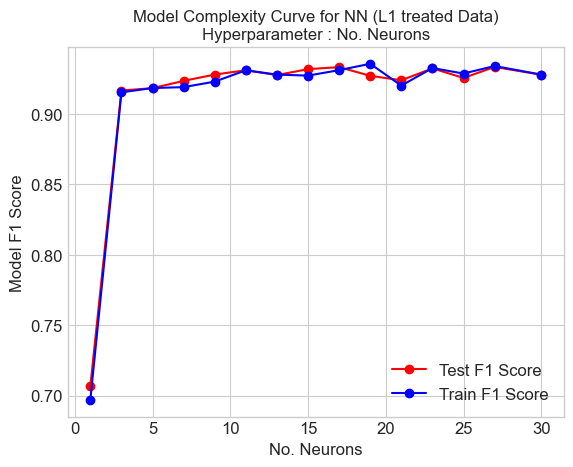

/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Per Hyperparameter tuning, best parameters are:
{'hidden_layer_sizes': 17, 'learning_rate_init': 0.01}


/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/wind/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't conv

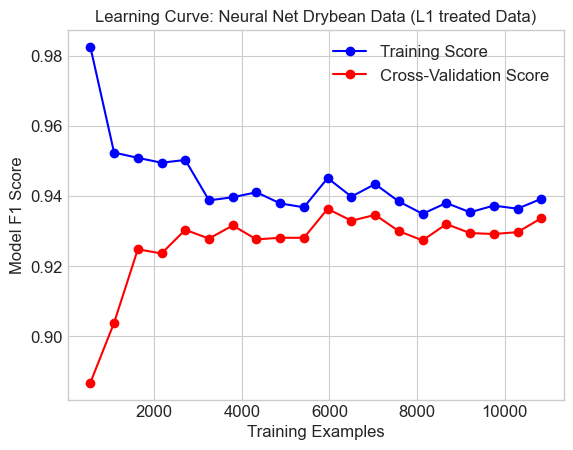

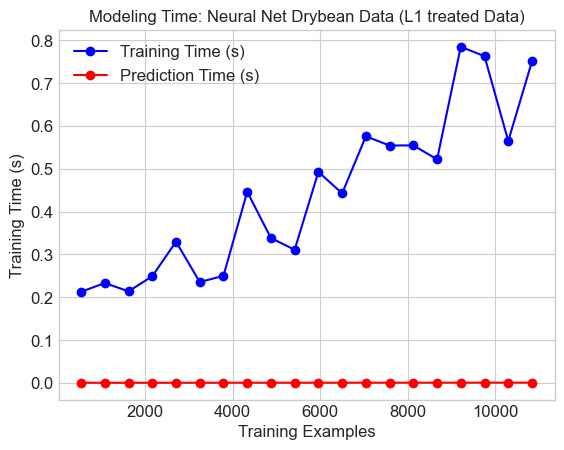

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.55374
Model Prediction Time (s): 0.00133

F1 Score:  0.94
Balanced Accuracy:  0.94     AUC:       1.00
Precision: 0.94     Recall:    0.94
*****************************************************


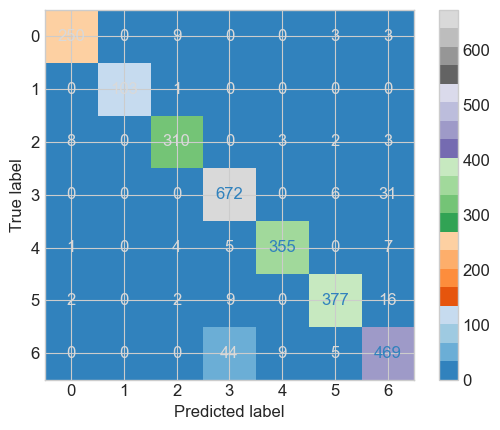

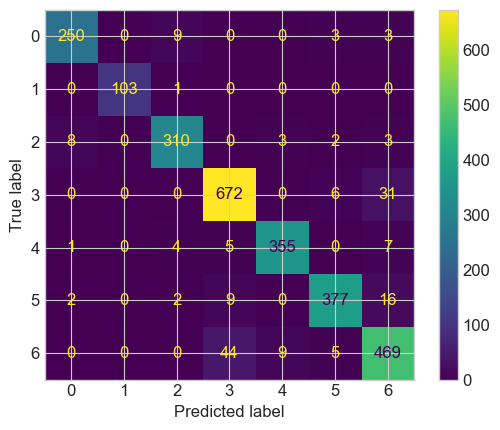

In [15]:
# NN on L1 treated data
hyperNN(X_l1_train, y_train, X_l1_test, y_test,title="Model Complexity Curve for NN (L1 treated Data)\nHyperparameter : No. Neurons")
h_units, learn_rate = NNGridSearchCV(X_l1_train, y_train)
estimator = MLPClassifier(hidden_layer_sizes=(h_units,), solver='adam', activation='relu', 
                               learning_rate_init=learn_rate, random_state=100, max_iter=500)
train_samp_l1, NN_fit_time_l1, NN_pred_time_l1 = plot_learning_curve(estimator, X_l1_train, y_train, title="Neural Net Drybean Data (L1 treated Data)")
final_classifier_evaluation(estimator, X_l1_train, X_l1_test, y_train, y_test)

The final section for neural network will plot the loss curve.

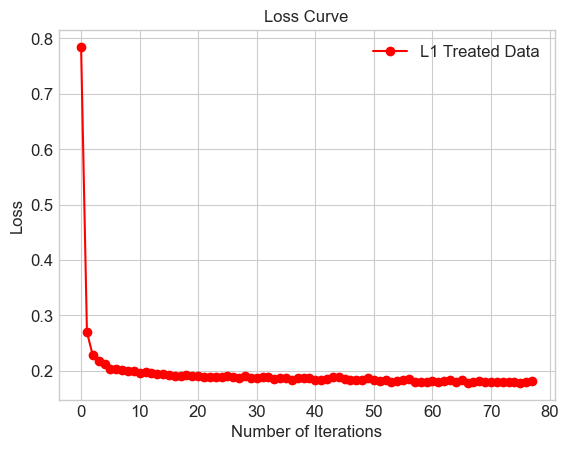

In [16]:
# loss curve
estimator_l1 = MLPClassifier(hidden_layer_sizes=(17,), solver='adam', activation='relu',
                               learning_rate_init=0.01, random_state=100, max_iter=500)
# L1 treated data
estimator_l1.fit(X_l1_train, y_train)
b = estimator_l1.loss_curve_

plt.figure()
plt.title("Loss Curve")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.plot(b, 'o-', color="r", label="L1 Treated Data")
plt.legend(loc="best")
plt.show()

### Support Vector Machine

This section will build a support vector machine classifier. The primary hyperparameter will be kernel function: linear, polynomial, rbf (radial basis function), and sigmoid. We will also explore the regularization penalty term 'C'.

In [17]:
from sklearn.svm import SVC

def hyperSVM(X_train, y_train, X_test, y_test, title):

    f1_test = []
    f1_train = []
    kernel_func = ['linear','poly','rbf','sigmoid']
    for i in kernel_func:         
            if i == 'poly':
                for j in [2,3,4,5,6,7,8]:
                    clf = SVC(kernel=i, degree=j, class_weight='balanced', random_state=100)
                    clf.fit(X_train, y_train)
                    y_pred_test = clf.predict(X_test)
                    y_pred_train = clf.predict(X_train)
                    f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
                    f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))
            else:    
                clf = SVC(kernel=i, class_weight='balanced', random_state=100)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                y_pred_train = clf.predict(X_train)
                f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
                f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))
                
    xvals = ['linear','poly2','poly3','poly4','poly5','poly6','poly7','poly8','rbf','sigmoid']
    plt.plot(xvals, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(xvals, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('Kernel Function')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
def SVMGridSearchCV(X_train, y_train):
    #parameters to search:
    #Regularization penalty parameter, C
    Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1.0]
    param_grid = {'C': Cs}

    clf = GridSearchCV(estimator = SVC(kernel='rbf',class_weight='balanced', random_state=100),
                       param_grid=param_grid, cv=10, scoring="balanced_accuracy")
    clf.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(clf.best_params_)
    return clf.best_params_['C']

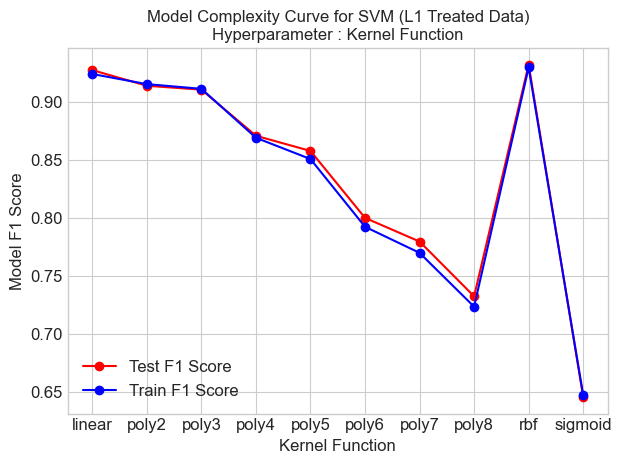

Per Hyperparameter tuning, best parameters are:
{'C': 1}


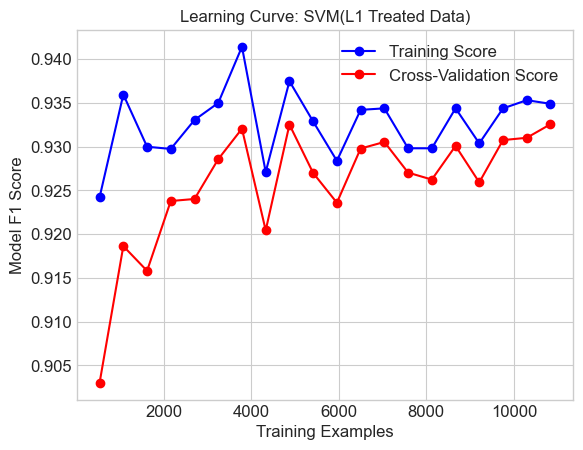

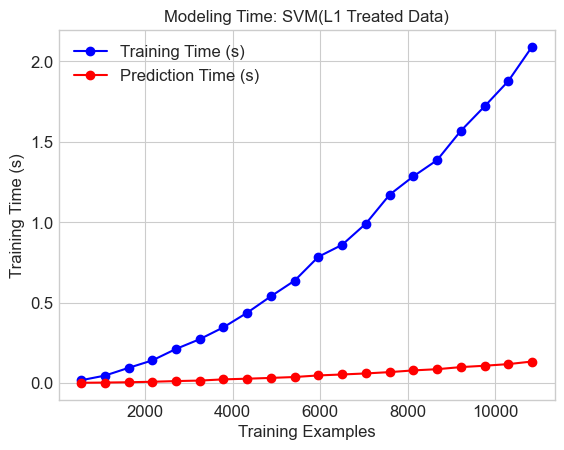

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   2.06121
Model Prediction Time (s): 0.58463

F1 Score:  0.93
Balanced Accuracy:  0.94     AUC:       1.00
Precision: 0.93     Recall:    0.93
*****************************************************


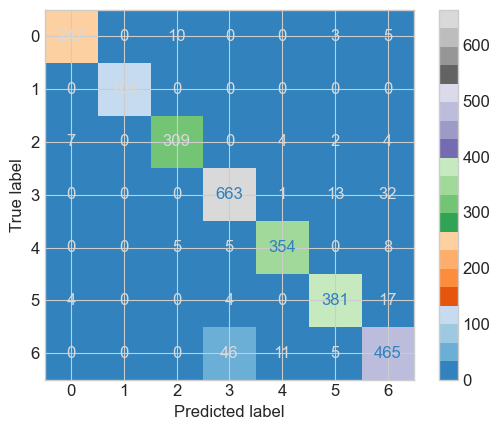

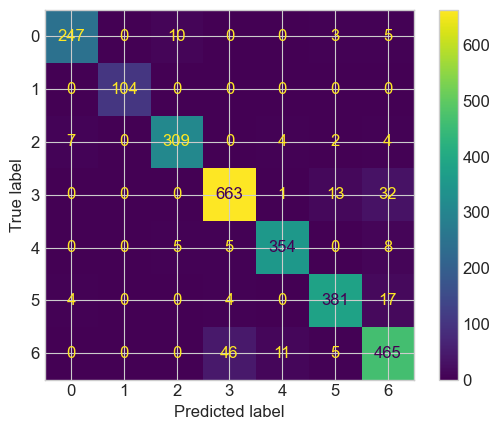

In [18]:

# L1 Treated data
hyperSVM(X_l1_train, y_train, X_l1_test, y_test,title="Model Complexity Curve for SVM (L1 Treated Data)\nHyperparameter : Kernel Function")
C_val_l1 = SVMGridSearchCV(X_l1_train, y_train)
estimator_l1 = SVC(C=C_val_l1, kernel='rbf', random_state=100, probability=True)
_, SVM_fit_time_l1, SVM_pred_time_l1 = plot_learning_curve(estimator_l1, X_l1_train, y_train,title="SVM(L1 Treated Data)")
final_classifier_evaluation(estimator_l1, X_l1_train, X_l1_test, y_train, y_test)

### KNN 

This section will build a classifier using K-nearest neighbors. The hyperparameter will be n_neighbors. The standard euclidean distance for all models is used here. The Model Complexity curve will show F1 score as a function of number of neighbors.

In [19]:
from sklearn.neighbors import KNeighborsClassifier as kNN

def hyperKNN(X_train, y_train, X_test, y_test, title):
    
    f1_test = []
    f1_train = []
    klist = np.linspace(1,31,30).astype('int')
    for i in klist:
        clf = kNN(n_neighbors=i,n_jobs=-1)
        clf.fit(X_train,y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        f1_test.append(f1_score(y_test, y_pred_test, average="weighted"))
        f1_train.append(f1_score(y_train, y_pred_train, average="weighted"))
        
    plt.plot(klist, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(klist, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('No. Neighbors')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

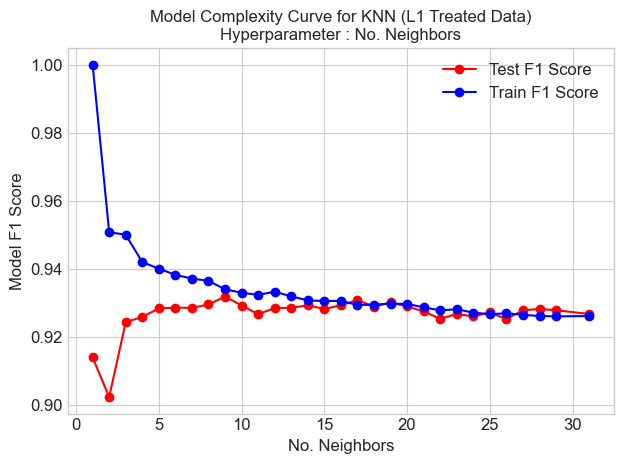

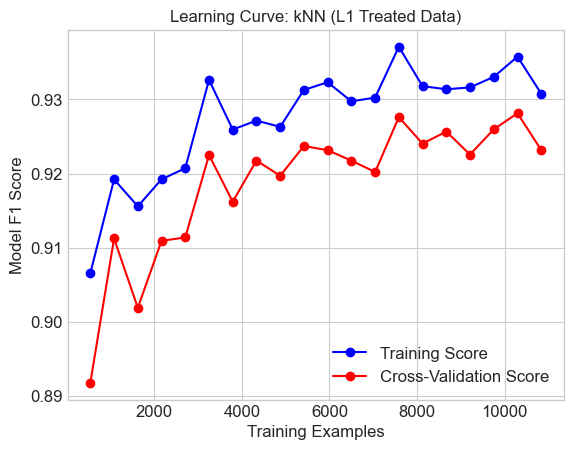

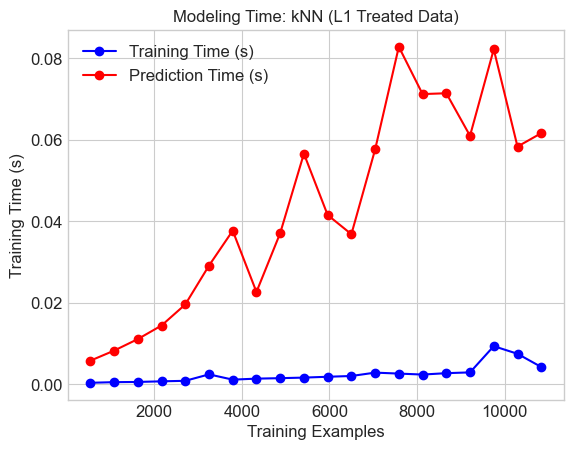

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.00358
Model Prediction Time (s): 0.07008

F1 Score:  0.93
Balanced Accuracy:  0.94     AUC:       0.99
Precision: 0.93     Recall:    0.93
*****************************************************


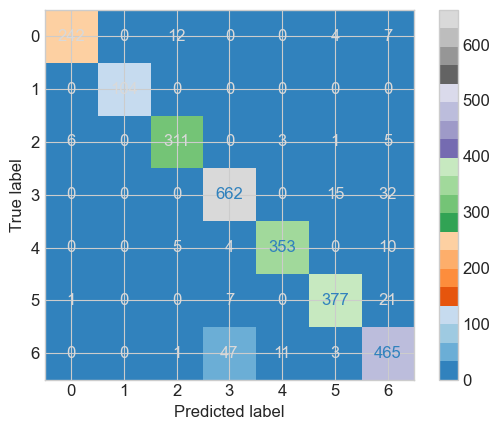

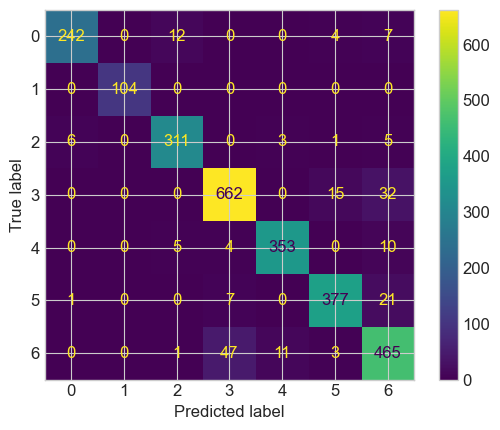

In [20]:

# L1 Treated data
hyperKNN(X_l1_train, y_train, X_l1_test, y_test,title="Model Complexity Curve for KNN (L1 Treated Data)\nHyperparameter : No. Neighbors")
estimator_l1 = kNN(n_neighbors=15, n_jobs=-1)
_, KNN_fit_time_l1, KNN_pred_time_l1 = plot_learning_curve(estimator_l1, X_l1_train, y_train,title="kNN (L1 Treated Data)")
final_classifier_evaluation(estimator_l1, X_l1_train, X_l1_test, y_train, y_test)

### Decision Tree

This section will build a Decision Tree Classifier using Gini index to determine the best feature split per the ID3 algorithm. The model will be pruned using cost complexity pruning technique by controlling paramenter ccp_alpha.

In [21]:
from sklearn.tree import DecisionTreeClassifier

def hyperTree(X_train, y_train, X_test, y_test, title):
    
    clfs = []
    clf = DecisionTreeClassifier(random_state=100, class_weight="balanced")
    path = clf.cost_complexity_pruning_path(X_train, y_train)
    for ccp_alpha in path.ccp_alphas:         
            clf = DecisionTreeClassifier(random_state=100, class_weight="balanced", ccp_alpha=ccp_alpha)
            clf.fit(X_train, y_train)
            clfs.append(clf)

    clfs = clfs[:-1]
    ccp_alphas = path.ccp_alphas[:-1]
    #print(ccp_alphas)

    y_pred_trains = [clf.predict(X_train) for clf in clfs]
    y_pred_tests = [clf.predict(X_test) for clf in clfs]

    f1_train = [f1_score(y_train, y_pred_train, average="weighted") for y_pred_train in y_pred_trains]
    f1_test = [f1_score(y_test, y_pred_test, average="weighted") for y_pred_test in y_pred_tests]
            
      
    plt.plot(ccp_alphas, f1_test, 'o-', color='r', label='Test F1 Score', drawstyle="steps-post")
    plt.plot(ccp_alphas, f1_train, 'o-', color = 'b', label='Train F1 Score', drawstyle="steps-post")
    plt.ylabel('Model F1 Score')
    plt.xlabel('Complexity Parameter')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

def DTGridSearchCV(X_train, y_train):
    #parameters to search:
    #Regularization penalty parameter, ccp

    ccp = np.linspace(1e-5,1e-3,30)
    param_grid = {'ccp_alpha': ccp}

    clf = GridSearchCV(estimator = DecisionTreeClassifier(random_state=100, class_weight="balanced"),
                       param_grid=param_grid, cv=10, scoring="balanced_accuracy")
    clf.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(clf.best_params_)
    return clf.best_params_['ccp_alpha']

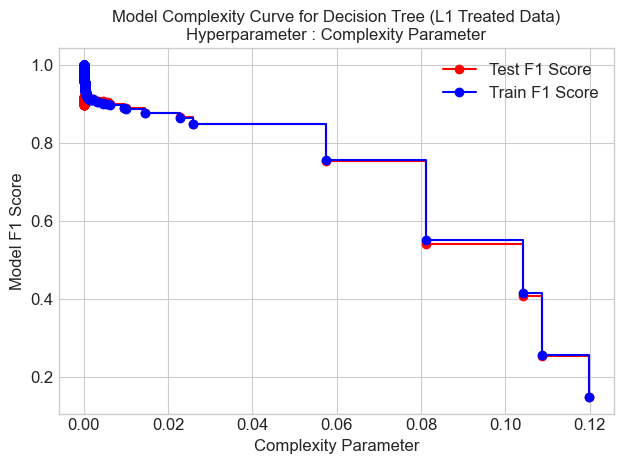

Per Hyperparameter tuning, best parameters are:
{'ccp_alpha': 0.00024896551724137937}


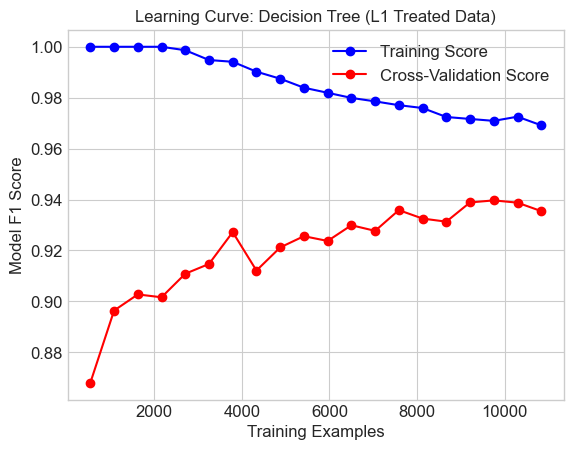

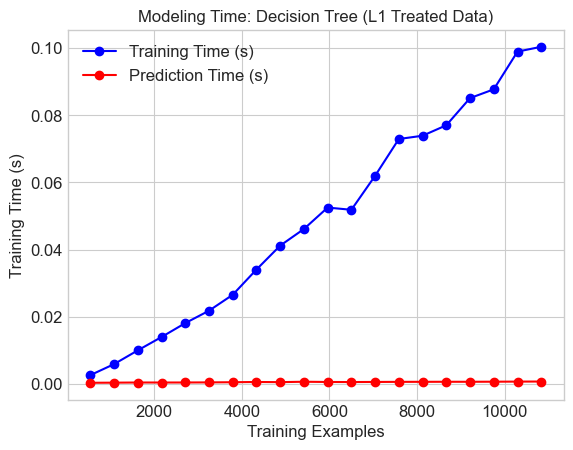

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   0.12061
Model Prediction Time (s): 0.00072

F1 Score:  0.91
Balanced Accuracy:  0.93     AUC:       0.98
Precision: 0.91     Recall:    0.91
*****************************************************


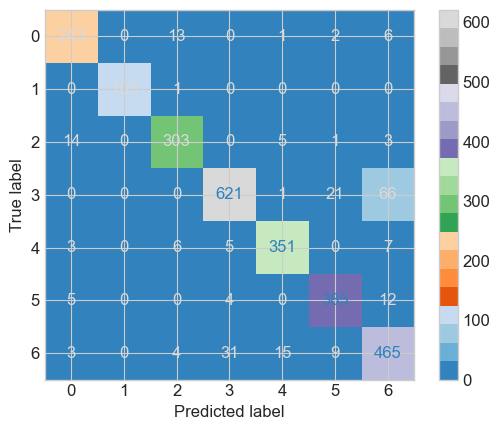

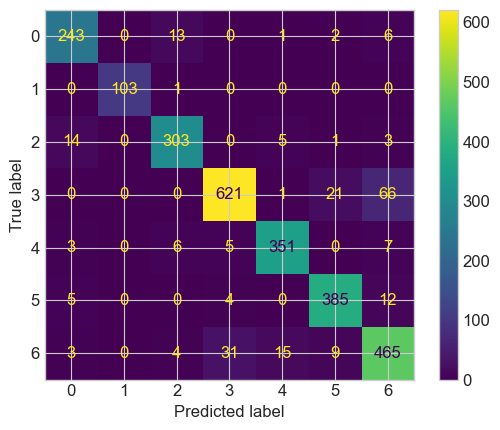

In [22]:
# L1 Treated data
hyperTree(X_l1_train, y_train, X_l1_test, y_test,title="Model Complexity Curve for Decision Tree (L1 Treated Data)\nHyperparameter : Complexity Parameter")
ccp_alpha = DTGridSearchCV(X_l1_train, y_train)
estimator = DecisionTreeClassifier(random_state=100, class_weight="balanced", ccp_alpha=ccp_alpha)
_, DT_fit_time_l1, DT_pred_time_l1 = plot_learning_curve(estimator, X_l1_train, y_train,title="Decision Tree (L1 Treated Data)")
final_classifier_evaluation(estimator, X_l1_train, X_l1_test, y_train, y_test)

### Boosted Decision Tree

This section will implement a boosted version of the decision tree. HistGradientBoostingClassifier is used. The hyperparameter of max_iter and learning rate are tuned to determine the contribution of each tree classifier.

In [27]:
from sklearn.ensemble import HistGradientBoostingClassifier

def hyperBoost(X_train, y_train, X_test, y_test, title):
    
    f1_test = []
    f1_train = []
    max_iteration = np.linspace(1,30,10).astype('int')
    for i in max_iteration:
            clf = HistGradientBoostingClassifier(max_iter=i, random_state=100)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test, average='weighted'))
            f1_train.append(f1_score(y_train, y_pred_train, average='weighted'))
      
    plt.plot(max_iteration, f1_test, 'o-', color='r', label='Test F1 Score')
    plt.plot(max_iteration, f1_train, 'o-', color = 'b', label='Train F1 Score')
    plt.ylabel('Model F1 Score')
    plt.xlabel('Max iteration')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

def BoostedGridSearchCV(X_train, y_train):
    #parameters to search:
    #n_estimators, learning_rate
    param_grid = {'max_iter': np.linspace(1,30,5).round().astype('int'),
                  'learning_rate': np.linspace(.01,1,4)}

    boost = GridSearchCV(estimator = HistGradientBoostingClassifier(), param_grid=param_grid, cv=10)
    boost.fit(X_train, y_train)
    print("Per Hyperparameter tuning, best parameters are:")
    print(boost.best_params_)
    return boost.best_params_['max_iter'], boost.best_params_['learning_rate']

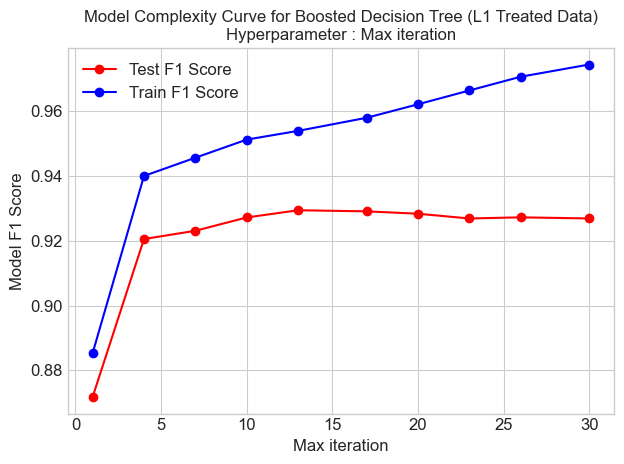

Per Hyperparameter tuning, best parameters are:
{'learning_rate': 0.34, 'max_iter': 8}


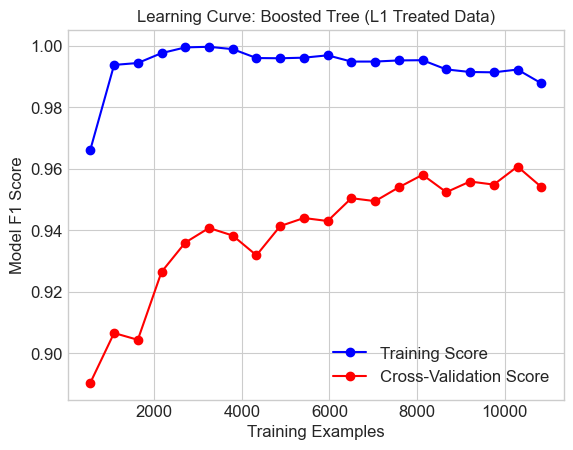

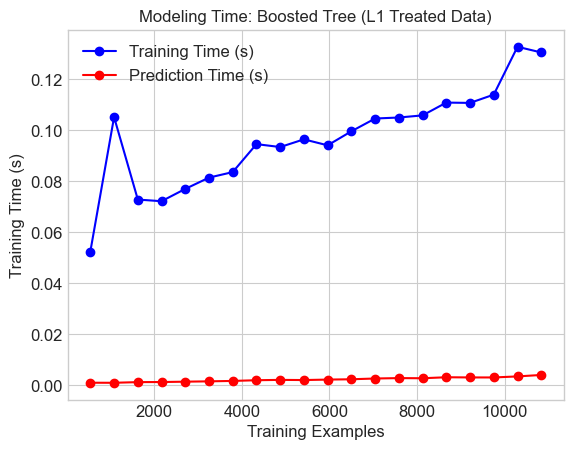

Model Evaluation Metrics Using Test Dataset
*****************************************************
Model Training Time (s):   3.38259
Model Prediction Time (s): 0.05114

F1 Score:  0.90
Balanced Accuracy:  0.88     AUC:       0.96
Precision: 0.91     Recall:    0.91
*****************************************************


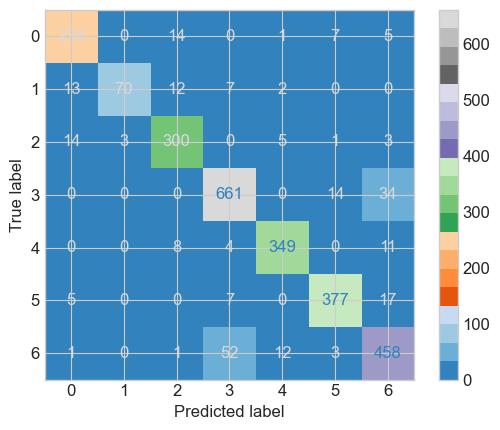

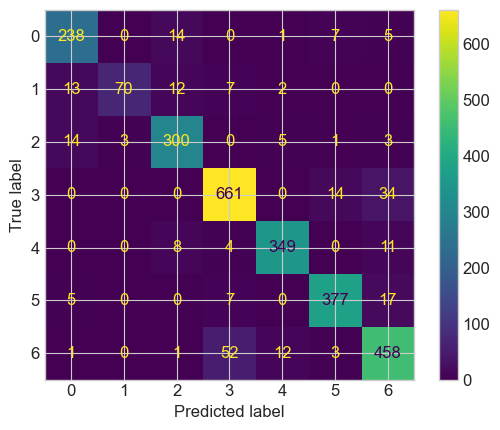

In [28]:

# L1 Treated data
hyperBoost(X_l1_train, y_train, X_l1_test, y_test,title="Model Complexity Curve for Boosted Decision Tree (L1 Treated Data)\nHyperparameter : Max iteration")
max_iter_l1, learn_rate_l1 = BoostedGridSearchCV(X_l1_train,y_train)
estimator_l1 = HistGradientBoostingClassifier(max_iter=max_iter_l1, learning_rate=learn_rate_l1, random_state=100)

_, BT_fit_time_l1, BT_pred_time_l1 = plot_learning_curve(estimator_l1, X_l1_train, y_train, title="Boosted Tree (L1 Treated Data)")
final_classifier_evaluation(estimator_l1, X_l1_train, X_l1_test, y_train, y_test)

## Model Comparison Plots

Finally, Comparing training times and F1 score for the 5 different algorithms on L1 treated dataset

In [29]:
def compare_fit_time(n,NNtime, SMVtime, kNNtime, DTtime, BTtime, title):
    
    plt.figure()
    plt.title("Model Training Times: " + title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model Training Time (s)")
    plt.plot(n, NNtime, '-', color="b", label="Neural Network")
    plt.plot(n, SMVtime, '-', color="r", label="SVM")
    plt.plot(n, kNNtime, '-', color="g", label="kNN")
    plt.plot(n, DTtime, '-', color="m", label="Decision Tree")
    plt.plot(n, BTtime, '-', color="k", label="Boosted Decision Tree")
    plt.legend(loc="best")
    plt.show()
    
def compare_pred_time(n,NNpred, SMVpred, kNNpred, DTpred, BTpred, title):
    
    plt.figure()
    plt.title("Model Prediction Times: " + title)
    plt.xlabel("Training Examples")
    plt.ylabel("Model Prediction Time (s)")
    plt.plot(n, NNpred, '-', color="b", label="Neural Network")
    plt.plot(n, SMVpred, '-', color="r", label="SVM")
    plt.plot(n, kNNpred, '-', color="g", label="kNN")
    plt.plot(n, DTpred, '-', color="m", label="Decision Tree")
    plt.plot(n, BTpred, '-', color="k", label="Boosted Decision Tree")
    plt.legend(loc="best")
    plt.show()


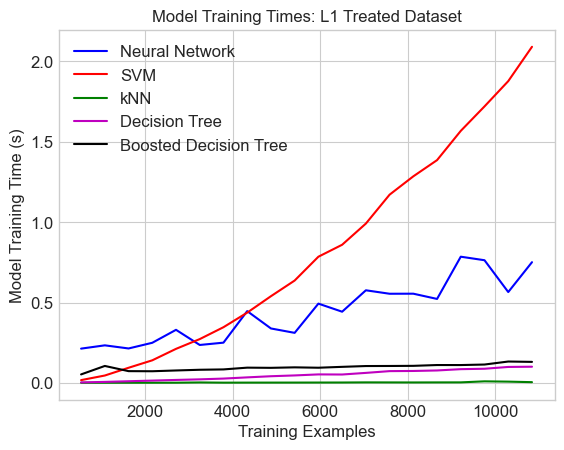

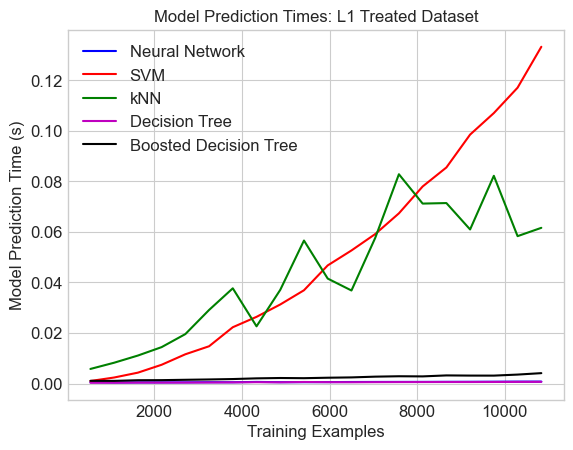

In [30]:
compare_fit_time(train_samp_l1, NN_fit_time_l1, SVM_fit_time_l1, KNN_fit_time_l1,
                 DT_fit_time_l1, BT_fit_time_l1, 'L1 Treated Dataset')      
                         
compare_pred_time(train_samp_l1, NN_pred_time_l1, SVM_pred_time_l1, KNN_pred_time_l1,
                 DT_pred_time_l1, BT_pred_time_l1, 'L1 Treated Dataset')   